
# Optimiser la gestion des données d'une boutique de spiritueux


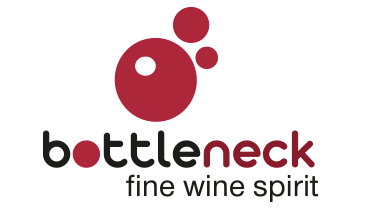


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
erp = pd.read_csv('erp.csv', sep=';', encoding='UTF-8')
liaison = pd.read_csv('liaison.csv', sep=';', encoding='UTF-8')
web = pd.read_csv('web.csv', sep=';', encoding='ANSI')

# 1ère partie : traitement des dataframe

## Traitement du df erp

In [3]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [5]:
# je modifie le type de product_id int64 à str
erp['product_id']=erp['product_id'].astype("str")
erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [6]:
erp.duplicated('product_id').sum()

0

In [7]:
erp['product_id'].isna().sum()

0

In [8]:
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825,825.000000,825.000000,825.000000,825
unique,825,NaN,NaN,NaN,2
top,3847,NaN,NaN,NaN,instock
freq,1,NaN,NaN,NaN,638
mean,NaN,0.869091,32.415636,26.496970,NaN
std,NaN,0.337506,26.795849,45.892422,NaN
min,NaN,0.000000,5.200000,0.000000,NaN
25%,NaN,1.000000,14.600000,1.000000,NaN
50%,NaN,1.000000,24.400000,11.000000,NaN
75%,NaN,1.000000,42.000000,34.000000,NaN


* Pas de doublon.
* En stock 638 références/825.
* Prix moyen 32.42€, prix min : 5.20€, prix max : 225.00€

## Traitement du df liaison

In [9]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [10]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [11]:
# je modifie le type de product_id int64 à str
liaison['product_id']=liaison['product_id'].astype("str")
liaison.dtypes

product_id    object
id_web        object
dtype: object

In [12]:
liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

* 91 valeurs manquantes pour id_web, aucune pour product_id, aucun doublon.
* je souhaite remplacer les valeurs manquantes par les valeurs du product_id correspondantes.

In [13]:
# on fait la liste des valeurs à remplacer : on sélectionne les lignes dont la valeur est manquante.
liaison_null = liaison.loc[liaison['id_web'].isnull(),:]
liaison_null

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [14]:
# on crée la nouvelle liste de valeur
nouvelle_valeur = liaison_null['product_id'].tolist()

Avant de changer les valeurs, je regarde si ces lignes ont un intérêt ou si elles peuvent être supprimées.

In [15]:
# on regarde les produits sans correspondance sur le site
erp_sans_id_web=erp[erp['product_id'].isin(nouvelle_valeur)]
erp_sans_id_web['onsale_web'].value_counts()

0    88
1     3
Name: onsale_web, dtype: int64

In [16]:
# on regarde les produits avec correspondance sur le site
erp_avec_id_web=erp[~erp['product_id'].isin(nouvelle_valeur)]
erp_avec_id_web['onsale_web'].value_counts()

1    714
0     20
Name: onsale_web, dtype: int64

* La plupart des articles(88/91) sans correspondance (91/825) ne sont pas en vente sur le site .
* La plupart des articles (714/734) avec correspondance (734/825) sont en vente sur le site.
* Je décide de ne conserver que les 734 références avec correspondance

In [17]:
erp=erp_avec_id_web
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
792,7023,1,27.5,15,instock
793,7025,1,69.0,2,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [18]:
 # on remplace le nom de la colonne id_web par sku
liaison.rename(columns={'id_web':'sku'}, inplace=True)

In [19]:
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


## Traitement df web 

In [20]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [21]:
web.duplicated('sku').sum()

798

In [22]:
web['sku'].value_counts()

bon-cadeau-25-euros    2
14828                  2
14679                  2
15526                  2
16305                  2
                      ..
15145                  2
15801                  2
15452                  2
15038                  2
16230                  2
Name: sku, Length: 714, dtype: int64

In [23]:
web.sort_values('sku').head(50)
# il y a 798 doublons ne diffèrent que par post_type ou post_mime_type

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1399,10014,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
628,10014,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-04 15:45:23,...,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
255,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1046,10459,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 15:58:19,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1106,10775,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 21:28:52,...,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
321,10775,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 21:28:52,...,albert-mann-pinot-gris-vendanges-tardives-alte...,2018-12-22 10:30:02,2018-12-22 09:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1072,10814,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-17 10:12:40,...,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
281,10814,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-17 10:12:40,...,thierry-germain-saumur-champigny-outre-terre-2013,2020-08-05 14:35:02,2020-08-05 12:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
257,11049,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 16:07:49,...,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1048,11049,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 16:07:49,...,alphonse-mellot-sancerre-rouge-en-grands-champ...,2020-01-31 09:30:02,2020-01-31 08:30:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [24]:
web=web[['sku','total_sales','post_name']].copy()
web

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
1508,16135,5.0,mouthes-le-bihan-aime-chai-2015
1509,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
1510,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
1511,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [25]:
web.dtypes

sku             object
total_sales    float64
post_name       object
dtype: object

In [26]:
web.drop_duplicates(inplace=True)
web

,sku,total_sales,post_name
0,bon-cadeau-25-euros,10.0,bon-cadeau-de-25-euros
1,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,pierre-jean-villa-igp-gamine-2018
...,...,...,...
762,16135,5.0,mouthes-le-bihan-aime-chai-2015
767,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
768,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
797,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2


In [27]:
web['sku'].nunique()

714

Il y a 714 références en vente sur le site.

## Création de la table ventes, fusion des df

Pour réaliser la table vente, je fais le choix de conserver tous les produits de l'erp :
 * je crée une première table (tableau1) en fusionnant les df erp et liaison 
 * puis une seconde, en fusionnant les df tableau1 et web.

In [28]:
tableau1 =pd.merge(erp, liaison, on = 'product_id', how = 'left')
tableau1

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


In [29]:
ventes =pd.merge(tableau1, web, on = 'sku', how = 'left')
ventes

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017
...,...,...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018
730,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018
731,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2
732,7329,0,26.5,14,instock,14680-1,NaN,NaN


# 2ème partie : Analyse

## Etude du chiffre d'affaire

In [30]:
ventes.isna().sum()

product_id         0
onsale_web         0
price              0
stock_quantity     0
stock_status       0
sku                0
total_sales       20
post_name         20
dtype: int64

Pour calculer le chiffre d'affaire, je supprime les nan:

In [31]:
ventes=ventes.loc[ventes['total_sales'].notnull(),:].copy()

In [32]:
# calcul du chiffre d'affaire par produit :
ventes['CA']=ventes['total_sales']*ventes['price']
ventes               

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,CA
0,3847,1,24.2,0,outofstock,15298,6.0,pierre-jean-villa-saint-joseph-preface-2018,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,pierre-jean-villa-igp-gamine-2018,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,pierre-jean-villa-cote-rotie-carmina-2017,0.0
...,...,...,...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135,5.0,mouthes-le-bihan-aime-chai-2015,42.0
729,7023,1,27.5,15,instock,15891,0.0,camin-larredya-jurancon-sec-la-virada-2018,0.0
730,7025,1,69.0,2,instock,15887,0.0,jamet-cote-rotie-fructus-voluptas-2018,0.0
731,7247,1,54.8,23,instock,13127-1,0.0,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0


In [33]:
#Top 20 des meilleures ventes :
chiffre_d_affaire=ventes[['product_id','price', 'total_sales', 'CA', 'stock_quantity', 'post_name']]
chiffre_d_affaire.sort_values(['CA'], ascending=False).head(20)

,product_id,price,total_sales,CA,stock_quantity,post_name
195,4334,49.0,96.0,4704.0,0,champagne-gosset-grand-blanc-de-blanc
71,4144,49.0,87.0,4263.0,11,champagne-gosset-grand-rose
219,4402,176.0,13.0,2288.0,8,cognac-frapin-vip-xo
70,4142,53.0,30.0,1590.0,8,champagne-gosset-grand-millesime-2006
69,4141,39.0,40.0,1560.0,1,gosset-champagne-grande-reserve
202,4355,126.5,11.0,1391.5,2,champagne-egly-ouriet-grand-cru-brut-blanc-de-...
200,4352,225.0,5.0,1125.0,0,champagne-egly-ouriet-grand-cru-millesime-2008
79,4153,29.0,36.0,1044.0,0,elian-daros-cotes-du-marmandais-clos-baquey-2015
670,6206,25.2,41.0,1033.2,120,domaine-giudicelli-patrimonio-blanc-2019
30,4068,16.6,62.0,1029.2,157,gilles-robin-crozes-hermitage-papillon-2019


In [34]:
CA=chiffre_d_affaire['CA'].sum()
print("Le chiffre d'affaire réalisé sur le site est de :", CA, "€")     

Le chiffre d'affaire réalisé sur le site est de : 70568.6 €


## Etude des prix

<AxesSubplot:>

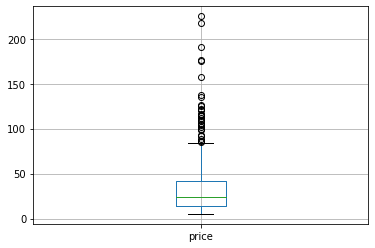

In [35]:
#détection de valeurs aberrantes :
ventes.boxplot('price')

In [36]:
ventes['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Le boxplot fait apparaître les outliers, au-delà de la moustache.

## Première méthode

En appliquant la méthode de l'écart interquantile, on peut déterminer précisément la valeur à partir de laquelle le prix de vente est considérée comme aberrant.

Outliers > Q3+1.5*IQ avec IQ=Q3-Q1

In [37]:
IQ=np.quantile(ventes['price'],.75)-np.quantile(ventes['price'],.25)
x=np.quantile(ventes['price'],.75) + IQ*1.5 
x

84.28750000000001

In [38]:
prix_aberrants=ventes.loc[ventes['price']>x, :].copy()
prix_aberrants

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,CA
63,4115,1,100.0,11,instock,15382,0.0,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0
65,4132,1,88.4,5,instock,11668,0.0,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0
200,4352,1,225.0,0,outofstock,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0
202,4355,1,126.5,2,instock,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5
206,4359,1,85.6,0,outofstock,13853,1.0,champagne-larmandier-bernier-grand-cru-vieille...,85.6
219,4402,1,176.0,8,instock,3510,13.0,cognac-frapin-vip-xo,2288.0
220,4404,1,108.5,2,instock,3507,2.0,cognac-frapin-fontpinot-xo,217.0
222,4406,1,157.0,3,instock,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0
223,4407,1,104.0,6,instock,3509,1.0,cognac-frapin-cigar-blend,104.0
229,4582,1,109.6,7,instock,12857,0.0,chateau-de-puligny-montrachet-1cru-champ-canet...,0.0


In [39]:
len(prix_aberrants)

32

In [40]:
# Pour mieux visualiser les outliers, j'utilise une représentation graphique par catégorie de prix
prix_aberrants['tranches de prix']=pd.cut(prix_aberrants['price'],5, precision=0)
prix_aberrants['tranches de prix'].value_counts()

(85.0, 113.0]     15
(113.0, 141.0]    11
(169.0, 197.0]     3
(197.0, 225.0]     2
(141.0, 169.0]     1
Name: tranches de prix, dtype: int64

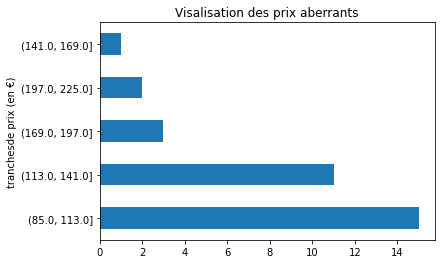

In [41]:
prix_aberrants['tranches de prix'].value_counts().sort_values(ascending=False).plot(kind='barh', title = 'Visalisation des prix aberrants', xlabel='tranchesde prix (en €)', ylabel='nombre de valeurs');

## Deuxième méthode

On applique la méthode du Z score : Z = (x - x.mean()) / x.std() > Z_seuil

In [42]:
ventes['Z']=(ventes['price']-ventes['price'].mean())/ventes['price'].std()
ventes_aberrantes=ventes.sort_values('Z', ascending=False)
ventes_aberrantes=ventes_aberrantes.loc[ventes_aberrantes['Z']>1.96,:]
ventes_aberrantes

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_name,CA,Z
200,4352,1,225.0,0,outofstock,15940,5.0,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0,6.922087
434,5001,1,217.5,20,instock,14581,0.0,david-duband-charmes-chambertin-grand-cru-2014,0.0,6.652405
601,5892,1,191.3,10,instock,14983,3.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,573.9,5.710315
219,4402,1,176.0,8,instock,3510,13.0,cognac-frapin-vip-xo,2288.0,5.160164
566,5767,1,175.0,12,instock,15185,0.0,camille-giroud-clos-de-vougeot-2016,0.0,5.124206
222,4406,1,157.0,3,instock,7819,0.0,cognac-frapin-chateau-de-fontpinot-1989-20-ans,0.0,4.476969
387,4904,1,137.0,13,instock,14220,5.0,domaine-des-croix-corton-charlemagne-grand-cru...,685.0,3.757817
661,6126,1,135.0,10,instock,14923,2.0,champagne-gosset-celebris-vintage-2007,270.0,3.685902
202,4355,1,126.5,2,instock,12589,11.0,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,1391.5,3.380262
524,5612,1,124.8,12,instock,14915,0.0,domaine-weinbach-gewurztraminer-gc-furstentum-...,0.0,3.319134


In [43]:
len(ventes_aberrantes)

30

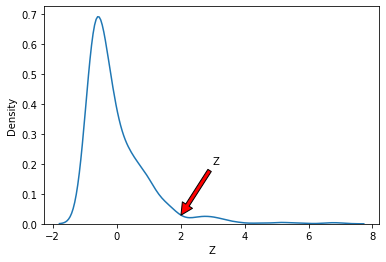

In [59]:
fig=sns.kdeplot(ventes['Z'])
fig.annotate('Z', xy=(1.96, 0.02), xytext=(3, 0.2), arrowprops=dict(facecolor='r', shrink=0.05));

# Conclusion

* La boutique Bottleneck référence 825 produits dont 638 sont en stocks.
* Le site de la boutique référence 714 produits.


* **Le chiffre d'affaire par produit est renseigné ci-dessous:**
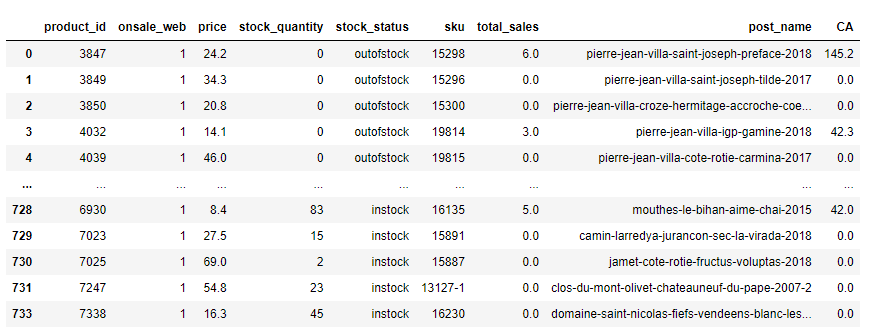


* **Le chiffre d'affaire réalisé sur le site est de 70 568.6 €**

* Les 20 meilleures ventes sont les suivantes :


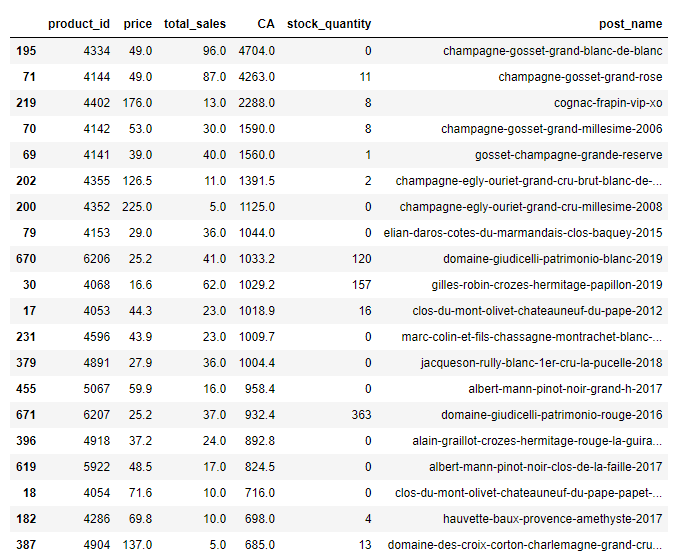

* Le prix de vente varie entre 5.20€ et 225.00€ avec un prix moyen de 32.50€.
* 50% des prix se situent entre 14.10€ et 42.18€.

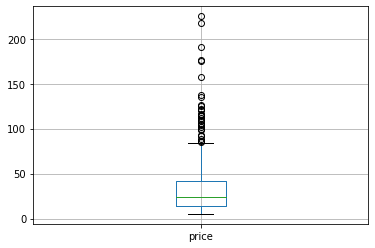

* **La méthode des interquantiles a permis d'identifier 32 prix atypiques, au-delà de 84.30€**

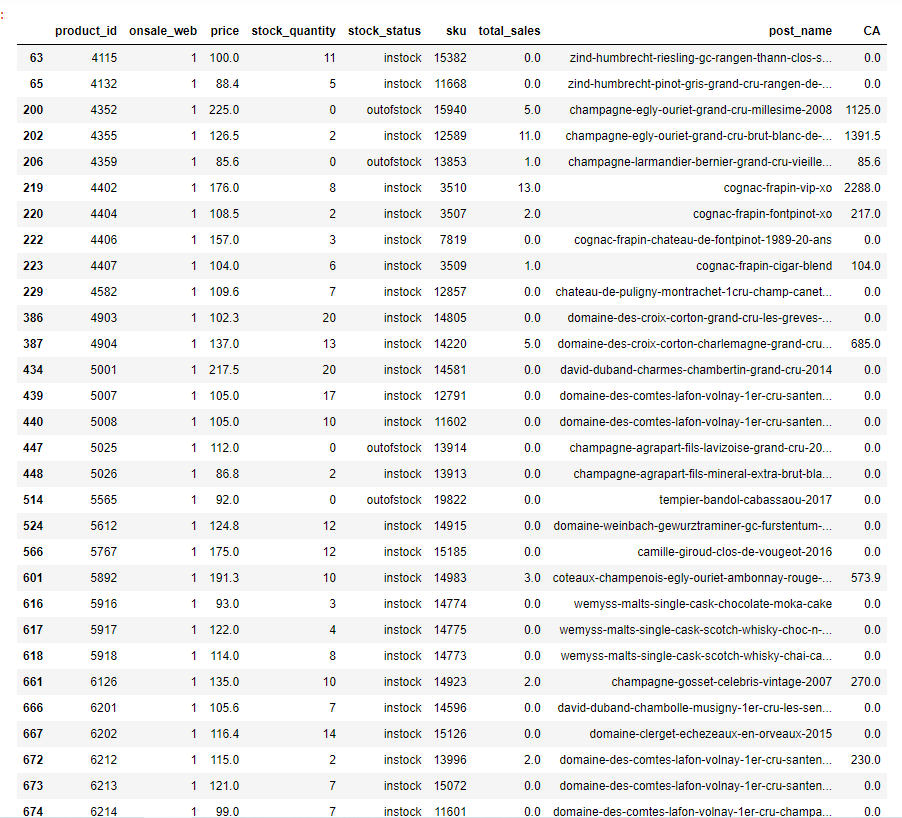

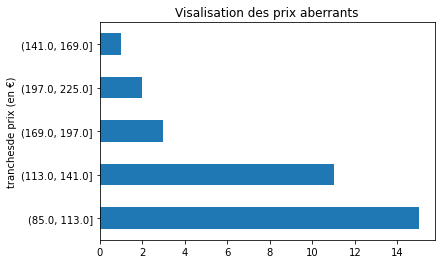

Je parle en conclusion de prix atypiques et non aberrants, parce ce que bien que très supérieurs à la grande majorité des prix leur distribution ne présente pas d'anomalie.